## Исследование данных о российском кинопрокате



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:,.2f}'.format

### Общая информация о данных

In [4]:
data_1 = pd.read_csv('/datasets/mkrf_movies.csv')
data_2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
#===============================
#  Небольшая предъобработка данных
#===============================
data_1['puNumber'] = data_1['puNumber'].apply(lambda x: x.lstrip() if not x.isdigit() else x)
data_1 = data_1[data_1['puNumber'] != 'нет']
data_1['puNumber'] = data_1['puNumber'].astype(int)

In [8]:
data = pd.merge(data_1, data_2, how='left', on=['puNumber'])

**Вывод:**
Колонка <code>puNumber</code> в `data_1` тип формат. В ней были найдены две аномадии "нет" и  `puNumber` начинающийся с пробела. Эти аномалии были обработаны: запись с значением "нет" отброшена, пробел убран. 

### Предобработка данных

#### Проверим типы данных

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [10]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [11]:
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype(float) 
data['ratings'] = data['ratings'].apply(lambda x: x / 10 if (x >= 10) else x)

**Вывод:**
* Колонка <code>show_start_date</code> имела тип `object`. Изменен на `datetime`
* Колонка <code>ratings</code> имела тип `object` и некоторые значения были написаны в процентах. Изменен на `float`

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Изучим пропуски в датафрейме

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [14]:
data['film_studio'].fillna('unknown', inplace=True)
data['production_country'].fillna('unknown', inplace=True)
data['director'].fillna('unknown', inplace=True)
data['producer'].fillna('unknown', inplace=True)
data['genres'].fillna('unknown', inplace=True)

In [15]:
data['director_tmp'] = data['director'].apply(lambda x: x.split(', ')[0])

In [16]:
for director in data['director_tmp'].unique():
    median = data.loc[data.director_tmp == director, 'ratings'].median()
    data.loc[(data.ratings.isna()) & (data.director_tmp == director), 'ratings'] = median

data.loc[data.ratings.isna(), 'ratings'] = data.ratings.median()

In [17]:
data.drop(['director_tmp'], axis=1, inplace=True)

**Вывод:**<br>
* Категориальные переменные были заполнены знаяением `unknown`, т.к. невозможно восстановить, что должно быть на месте пропусков
* Столбец `ratings` был заполнен медианой по режиссерам, т.к. она наиболее устойчива к выбросам
* Пропуски в остальных непрерывные переменные остались незаполненными, т.к. в них слишком много пропусков и заполнение их средним или медианой может привести к смещению выборки 

#### Обработка дубликатов в датафрейме

**Проверка на полные дубликаты**

In [18]:
data.duplicated(keep=False).sum()

0

**Проверка на дубликаты по столбцу** `puNumber`

In [19]:
data['puNumber'].duplicated(keep=False).sum()

4

In [20]:
data[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


**Вывод:**<br>
* Полных дубликатов не обнаружено
* В столбце `puNumber` обнаружено два дублирующихся значения, хотя фильиы которые соответствуют этим прокатным удостоверениям разные. К возможной причине можно отнести тот факт, что эти фильмы являются дилогией.

#### Изучение категориальных значений

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7485 non-null   object        
 5   production_country     7485 non-null   object        
 6   director               7485 non-null   object        
 7   producer               7485 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [22]:
categorical_columns = ['title', 'type', 'film_studio', 'production_country', 
                       'director', 'producer', 'age_restriction', 'financing_source']

for column in categorical_columns:
    print(column)
    print(data[column].unique())
    print('\n')


title
['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']


type
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


film_studio
['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']


production_country
['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Фран

In [23]:
data['type'] = data['type'].str.strip()

**Вывод:**<br>
Во всех категориальных переменных одинаковые значения могут быть написаны по разному

#### Шаг 2.5. Проверка количественных значений

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7485 non-null   object        
 5   production_country     7485 non-null   object        
 6   director               7485 non-null   object        
 7   producer               7485 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [25]:
numeric_columns = ['puNumber', 'refundable_support', 'nonrefundable_support', 
                   'budget', 'ratings', 'box_office']

data[numeric_columns].describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,485.00",332.00,332.00,332.00,"7,485.00","3,158.00"
mean,"135,196,587.56","11,864,457.83","48,980,988.89","127,229,716.68",6.48,"76,478,696.16"
std,"38,352,919.34","24,916,555.26","59,980,117.92","188,588,333.12",1.10,"240,353,122.82"
min,"1,811,096.00",0.00,0.00,0.00,1.00,0.00
25%,"112,025,118.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"121,015,510.00",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,314.00","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


In [26]:
#====================================
# Удалим колонки с бюджетом равным нулю
#====================================
data = data[data.budget < (data.refundable_support + data.nonrefundable_support)]

In [27]:
#==========================================================================
#  Заполним нулями пропуски в колонках refundable_support и nonrefundable_support
#===========================================================================
# data['refundable_support'].fillna(0, inplace=True)
# data['nonrefundable_support'].fillna(0, inplace=True)

In [28]:
data[numeric_columns].describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,17.00,17.00,17.00,17.00,17.00,17.00
mean,"112,067,204.47","16,705,882.35","65,174,674.41",0.00,5.78,"163,137,294.43"
std,"1,473,501.27","20,064,784.78","61,236,204.09",0.00,0.91,"251,115,991.43"
min,"111,000,415.00",0.00,0.00,0.00,4.30,"1,334,699.40"
25%,"111,009,615.00",0.00,"23,000,000.00",0.00,5.10,"50,451,949.00"
50%,"111,017,315.00","10,000,000.00","51,000,000.00",0.00,5.80,"72,937,783.20"
75%,"114,001,715.00","20,000,000.00","75,000,000.00",0.00,6.30,"184,487,551.40"
max,"114,006,518.00","60,000,000.00","250,000,000.00",0.00,7.80,"1,038,321,489.00"


In [30]:
# data[data['budget'].isna()][numeric_columns].sample(5)

**Вывод:**<br>
* В колонке <code>budget</code> были обноружены нулевые значений. Они были успешно исключены из выборки.
* Cтолбцы <code>budget</code>, <code>refundable_support</code> и <code>nonrefundable_support</code> имеют очень много пропусков в данных, причем для одних и тех же записей. Такие столбцы лучше исключить из анализа или по возможности дополнить.

#### Шаг 2.6. Добавим новые столбцы

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [31]:
data['show_year'] = data['show_start_date'].dt.year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [32]:
data['main_director'] = data['director'].apply(lambda x: x.split(', ')[0])

In [33]:
data['main_genre'] = data['genres'].apply(lambda x: x.split(',')[0])

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [34]:
data['prc_gov_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

### Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

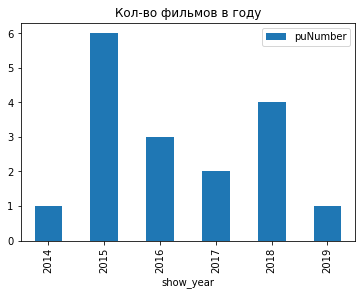

In [35]:
data[~data.box_office.isna()]\
    .pivot_table(index='show_year', values='puNumber', aggfunc='count')\
    .plot(kind='bar')
plt.title('Кол-во фильмов в году')
plt.show()

In [36]:
print('Доля фильмов вышедших в прокат:', len(data[~data.box_office.isna()]) / len(data))

Доля фильмов вышедших в прокат: 1.0


In [37]:
data.loc[data.box_office.isna(), 'release'] = 0
data.loc[~data.box_office.isna(), 'release'] = 1

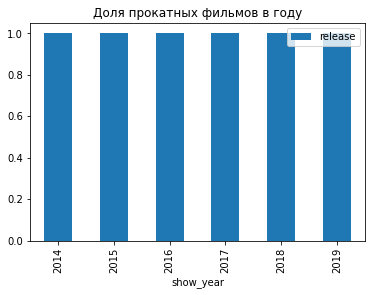

In [38]:
data.pivot_table(index='show_year', values='release').plot(kind='bar')
plt.title('Доля прокатных фильмов в году')
plt.show()

**Вывод:**
* Количества прокатных фильмов выросло с 100 до 520 в год
* Общая доля фильмов вышедших в прокат: 42%
* Доля прокатных фильмов выросла с 10% до 55%


- Посмотрим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

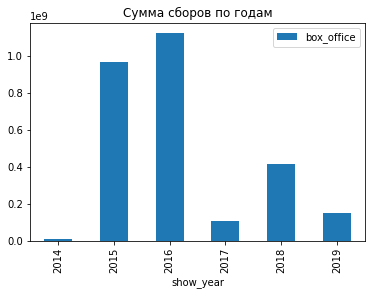

In [39]:
data[(~data.box_office.isna()) & (data.box_office != 0.0)]\
    .pivot_table(index='show_year', values='box_office', aggfunc='sum')\
    .plot(kind='bar')
plt.title('Сумма сборов по годам')
plt.show()

In [40]:
data[(~data.box_office.isna()) & (data.box_office != 0.0)]\
    .pivot_table(index='show_year', values='box_office', aggfunc='sum')

,box_office
show_year,
2014,"10,234,016.10"
2015,"969,537,997.31"
2016,"1,123,983,472.43"
2017,"105,559,963.76"
2018,"416,411,729.12"
2019,"147,606,826.51"


**Вывод:**<br>
* В 2015 голу произошел резкий рост. Сумма сборов увеличилась с 10 234 000 до 970 000 000
* Минимальная сумма сборов была в 2014 году и составила порядка 10 234 000 рублей
* Максимальная сумма сборов была в 2016 году и составила порядка 1 124 000 000 рублей

- Посчитаем среднюю и медианную сумму сборов для каждого года.

**Средняя сумма сборов**

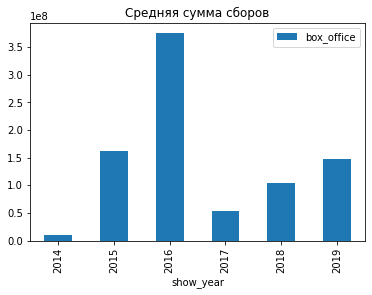

In [41]:
data[(~data.box_office.isna()) & (data.box_office != 0.0)]\
    .pivot_table(index='show_year', values='box_office')\
    .plot(kind='bar')
plt.title('Средняя сумма сборов')
plt.show()

**Медианная сумма сборов**

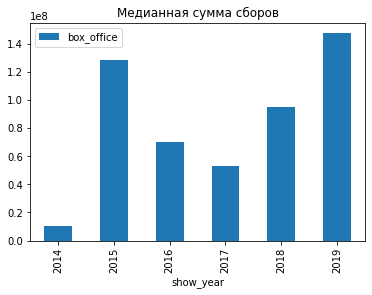

In [42]:
data[(~data.box_office.isna()) & (data.box_office != 0.0)]\
    .pivot_table(index='show_year', values='box_office', aggfunc='median')\
    .plot(kind='bar')
plt.title('Медианная сумма сборов')
plt.show()

In [43]:
data[(~data.box_office.isna()) & (data.box_office != 0.0)].groupby('show_year').agg({'box_office' : ['mean', 'median']})

box_office               
                    mean         median
show_year                              
2014       10,234,016.10  10,234,016.10
2015      161,589,666.22 128,712,667.30
2016      374,661,157.48  70,299,052.00
2017       52,779,981.88  52,779,981.88
2018      104,102,932.28  94,940,314.84
2019      147,606,826.51 147,606,826.51

In [44]:
data.box_office.isnull().groupby(data['show_year']).sum().astype(int).reset_index(name='cnt_nan')

,show_year,cnt_nan
0,2014,0
1,2015,0
2,2016,0
3,2017,0
4,2018,0
5,2019,0


**Вывод:** <br>
* в 2016 году наблюдается выское среднее значение суммы сборов
* Медиана очень схожее распределение, что и среденее значение, но медианные значения значительно меньше средних значений.

----

- Посмотрим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? 

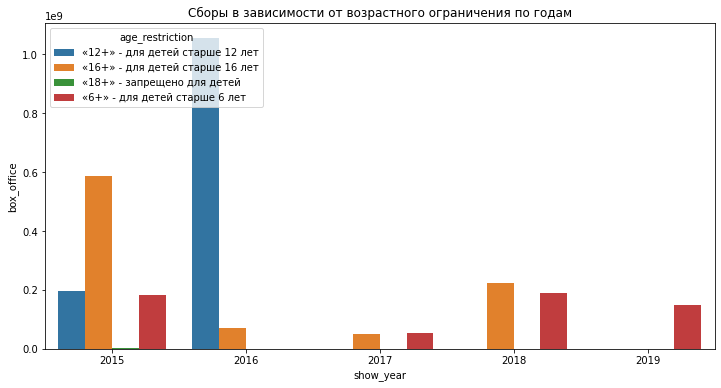

In [45]:
tmp = data[(~data.box_office.isna()) & (data['show_year'] > 2014)]\
            .groupby(['show_year', 'age_restriction'])['box_office']\
            .sum()\
            .reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=tmp, x='show_year', y='box_office', hue='age_restriction')
plt.title('Сборы в зависимости от возрастного ограничения по годам')
plt.show()

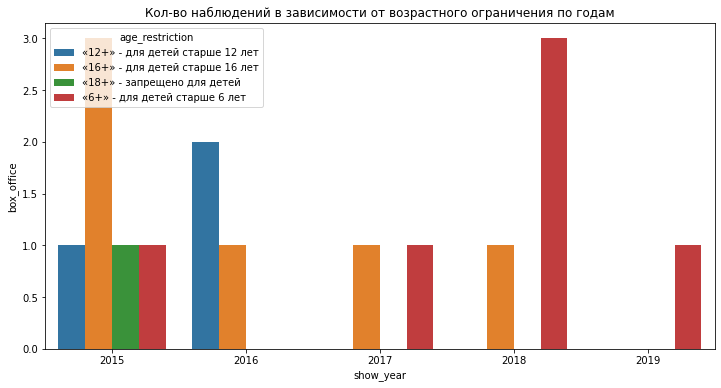

In [46]:
tmp = data[(~data.box_office.isna()) & (data['show_year'] > 2014)]\
            .groupby(['show_year', 'age_restriction'])['box_office']\
            .count()\
            .reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=tmp, x='show_year', y='box_office', hue='age_restriction')
plt.title('Кол-во наблюдений в зависимости от возрастного ограничения по годам')
plt.show()

**Вывод:**<br>
* Почти во все года максимальные сборы у фильмов с категорией 12+ и 16+
* Ситуация от года практически не меняется. Исключение составляет 2017 год когда вторые по величине сборы были у категории фильмов 6+
* Также у фильмов категории 0+ мало данных (особенно бросаются в глаза последние 3 года), чтобы сделать корректные выводы нухно чуть больше данных по этой категории

### Исследуем фильмы, которые получили государственную поддержку

In [47]:
data[~data.financing_source.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2052 to 6822
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  17 non-null     object        
 1   puNumber               17 non-null     int64         
 2   show_start_date        17 non-null     datetime64[ns]
 3   type                   17 non-null     object        
 4   film_studio            17 non-null     object        
 5   production_country     17 non-null     object        
 6   director               17 non-null     object        
 7   producer               17 non-null     object        
 8   age_restriction        17 non-null     object        
 9   refundable_support     17 non-null     float64       
 10  nonrefundable_support  17 non-null     float64       
 11  budget                 17 non-null     float64       
 12  financing_source       17 non-null     object        
 13  ra

**Предобработка данных**

In [48]:
median = data['box_office'].median()
data['box_office'].fillna(median, inplace=True)

In [49]:
data['gov_support'] = data['refundable_support'] + data['nonrefundable_support']
data['payback'] = data['budget'] / data['box_office']

**Исследование**

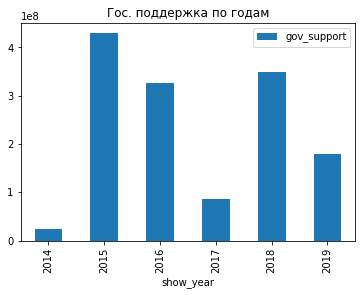

In [50]:
data[~data.financing_source.isna()]\
    .pivot_table(index='show_year', values='gov_support', aggfunc='sum')\
    .plot(kind='bar')
plt.title('Гос. поддержка по годам')
plt.show()

In [51]:
data[~data.financing_source.isna()]\
    .pivot_table(index='show_year', values='gov_support', aggfunc='sum')

,gov_support
show_year,
2014,"23,000,000.00"
2015,"429,000,000.00"
2016,"326,000,000.00"
2017,"85,000,000.00"
2018,"348,969,465.00"
2019,"180,000,000.00"


**Вывод:**
На графике можно заметить возрастающий тренд в сумме, которая выделяется на поддержу кино.

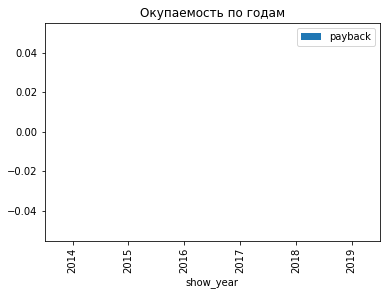

In [52]:
data[~data.financing_source.isna()]\
    .pivot_table(index='show_year', values='payback')\
    .plot(kind='bar')
plt.title('Окупаемость по годам')
plt.show()

**Вывод:**<br>
Фильмы получившие гос. поддержку имеют достаточно высокую окупаемость. Особенно выделается 2015 год.

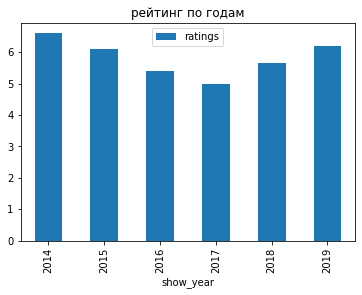

In [53]:
data[~data.financing_source.isna()]\
    .pivot_table(index='show_year', values='ratings')\
    .plot(kind='bar')
plt.title('рейтинг по годам')
plt.show()

**Вывод:** <br>
Средний рейтинг фильмов с гос поддержкой не сильно отличаеися от года к году

In [54]:
data[~data.financing_source.isna()]\
    .groupby('main_genre')['ratings']\
    .mean()\
    .reset_index()\
    .sort_values(by='ratings', ascending=False)\
    .head(5)

,main_genre,ratings
1,боевик,7.80
0,unknown,6.60
2,драма,6.60
4,мелодрама,6.60
6,триллер,5.80


 **Вывод:**<br>
 Самый высокий рейтинг (7.8) имеют фильмы в жанре "боевик"

In [55]:
data[~data.financing_source.isna()]\
    .groupby('main_genre')['ratings']\
    .count()\
    .reset_index()\
    .sort_values(by='ratings', ascending=False)\
    .head(5)

,main_genre,ratings
3,комедия,6
5,мультфильм,5
0,unknown,1
1,боевик,1
2,драма,1


**Вывод:** <br>
Чаще всего гос. поддержка выделяется на мультфильмы и комедии.

In [56]:
data[~data.financing_source.isna()].type.value_counts()

Художественный    11
Анимационный       6
Name: type, dtype: int64

**Вывод:**<br>
Самые популярные фильмы - художественные

In [57]:
data[~data.financing_source.isna()].age_restriction.value_counts()

«16+» - для детей старше 16 лет    7
«6+» - для детей старше 6 лет      6
«12+» - для детей старше 12 лет    3
«18+» - запрещено для детей        1
Name: age_restriction, dtype: int64

**Вывод:**<br>
Чаще всего снимают фильмы для лиц старше 16 и 6 лет

### Общий вывод

Было проведено исследование, цель которого изучить рынок российского кинопроката и выявить текущие тренды. Входные данные от Министерства культуры — информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

<br>

Необходимо было проверить несколько гипотез:
1. <ins>Гипотеза № 1</ins>:  Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах?
2. <ins>Гипотеза № 2</ins>:  Как менялась динамика проката по годам?
3. <ins>Гипотеза № 3</ins>:  Сравнить значения средней и медианной суммы сборов для каждого года.
4. <ins>Гипотеза № 4</ins>:  Влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год?
5. <ins>Гипотеза № 5</ins>:  Исследуйте фильмы, которые получили государственную поддержку.

<br>

Результаты исследования показали:

<br>

**Гипотеза № 1 подтверждена:** 
- Количества прокатных фильмов выросло с 100 в 2010 году до 520 в 2019 году
- Общая доля фильмов вышедших в прокат с 2010 по 2019: 42%
- Доля прокатных фильмов выросла с 10% (2010 год) до 55% (2019 год) 

<br>

**Гипотеза № 2 подтверждена:**
- В 2015 голу произошел резкий рост. Сумма сборов увеличилась с 8 700 000 000 до 40 000 000 000
- Минимальная сумма сборов была в 2010 году и составида полядка 2 000 000 000 рублей
- Максимальная сумма сборов была в 2018 году и составида полядка 50 000 000 000 рублей

<br>

**Гипотеза № 3 подтверждена:**
- Медиана очень схожее распределение, что и среденее значение, но медианные значения значительно меньше средних значений.
- Медиана колеблиться от 1 710 до 4 700 000
- Средене значение колеблиться от 24 000 до 91 400 000

<br>

**Гипотеза № 4 частично подтверждена:** *(у фильмов категории 0+ мало данных (особенно бросаются в глаза последние 3 года))*
- Почти во все года максимальные сборы у фильмов с категорией 12+ и 16+
- Ситуация от года практически не меняется. Исключение составляет 2017 год когда вторые по величине сборы были у категории фильмов 6+
<br>

*Рекомедация:* провести дополнительные исследования на большей выборке  

<br>

**Гипотеза № 5 частично подтверждена:** *(Выбока, на которой проводилось исследование имеет всего 322 наблюдений)*
- Имеется возрастающий тренд в сумме, которая выделяется на поддержу кино (с 134 000 000 в 2013 году до 4 900 000 000 в 2019 году).
- Средний рейтинг фильмов с гос. поддержкой не сильно отличаеися от года к году и колеблиться от 6 до 7.7
- Самый высокий рейтинг и фильмов с жанром "криминал": 7.5
- Чаще всего гос. поддержка выделяется на фильмы с жанрами "драма" и "комедия"
- Большинство фильмов с гос. поддержкой имеют возратсной ценз "12+" и "16+"
- Все фильмы с гос. поддержки имеют очень высокую окупаемость, что говорит об убыточности кинопрокатов.
<br>

*Рекомедация:* провести дополнительные исследования на большей выборке  